<a href="https://colab.research.google.com/github/haeniKim/metaverse-academy/blob/master/ComputerVision/230906_deeplabv3_seg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import torch
from torchvision import transforms, models
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
model = models.segmentation.deeplabv3_resnet101(pretrained=True).eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth
100%|██████████| 233M/233M [00:01<00:00, 230MB/s]


In [ ]:
labels = ['background', 'aeroplane', 'bicycle' , 'bird', 'boat' , 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']
len(labels)

21

In [ ]:
cmap = plt.cm.get_cmap('tab20c')
colors = (cmap(np.arange(cmap.N))*255).astype('int')[:, 0:3].tolist()
colors

<ipython-input-10-f05f721fb355>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20c')


[[49, 130, 189],
 [107, 174, 214],
 [158, 202, 225],
 [198, 219, 239],
 [230, 85, 13],
 [253, 141, 60],
 [253, 174, 107],
 [253, 208, 162],
 [49, 163, 84],
 [116, 196, 118],
 [161, 217, 155],
 [199, 233, 192],
 [117, 107, 177],
 [158, 154, 200],
 [188, 189, 220],
 [218, 218, 235],
 [99, 99, 99],
 [150, 150, 150],
 [189, 189, 189],
 [217, 217, 217]]

In [ ]:
cmap(np.arange(cmap.N))*255 #컬러맵 생상값 추출 R, G, B, A

array([[ 49., 130., 189., 255.],
       [107., 174., 214., 255.],
       [158., 202., 225., 255.],
       [198., 219., 239., 255.],
       [230.,  85.,  13., 255.],
       [253., 141.,  60., 255.],
       [253., 174., 107., 255.],
       [253., 208., 162., 255.],
       [ 49., 163.,  84., 255.],
       [116., 196., 118., 255.],
       [161., 217., 155., 255.],
       [199., 233., 192., 255.],
       [117., 107., 177., 255.],
       [158., 154., 200., 255.],
       [188., 189., 220., 255.],
       [218., 218., 235., 255.],
       [ 99.,  99.,  99., 255.],
       [150., 150., 150., 255.],
       [189., 189., 189., 255.],
       [217., 217., 217., 255.]])

In [ ]:
np.random.seed(222)
np.random.shuffle(colors)
colors.insert(0, [0, 0, 0])
colors = np.array(colors, dtype=np.uint8)

palette_map = np.empty((10, 0, 3), dtype= np.uint8)

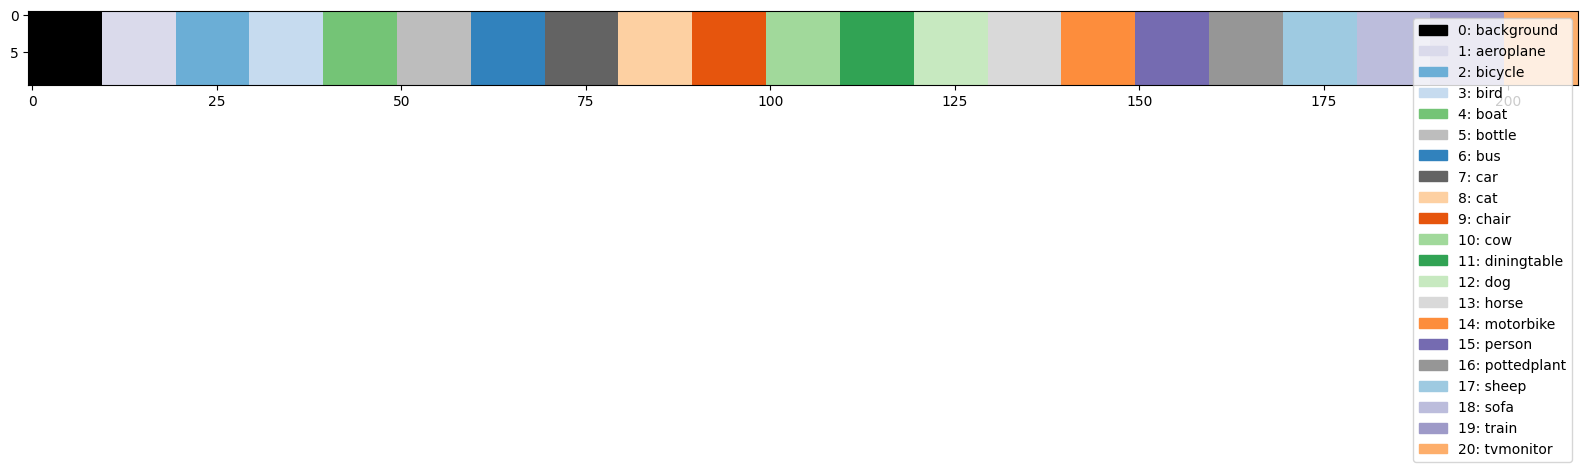

In [ ]:
legend = []

for i in range(21):
  legend.append(mpatches.Patch(color=np.array(colors[i]) / 255. , label='%d: %s' % (i, labels[i])))
  c = np.full((10, 10, 3), colors[i], dtype=np.uint8)
  palette_map = np.concatenate([palette_map, c], axis = 1)

plt.figure(figsize=(20, 2))
plt.legend(handles=legend)
plt.imshow(palette_map)



In [ ]:
def segment(net, img):
  #전처리
  preprocess = transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize(
          mean = [0.485, 0.456, 0.406],
          std = [0.229, 0.224, 0.225]
      )
  ])

  input_tensor = preprocess(img) #채널, 세로, 가로
  input_batch = input_tensor.unsqueeze(0) #배치, 채널, 세로, 가로

  #gpu 얹기
  if torch.cuda.is_available():
    input_batch.to('cuda')
    model.to('cuda')

  output = model(input_batch)['out'][0]
  print(output[:, 0, 0])
  output_predictions = output.argmax(0).byte().cpu().numpy()
  print(output.argmax(0))
  r = Image.fromarray(output_predictions).resize((img.shape[1], img.shape[0]))
  r.putpalette(colors)

  return r, output_predictions

In [ ]:
!wget https://ilyo.co.kr/contents/article/images/2021/0620/1624156764294425.jpg -O h.jpg

--2023-09-06 01:11:44--  https://ilyo.co.kr/contents/article/images/2021/0620/1624156764294425.jpg
Resolving ilyo.co.kr (ilyo.co.kr)... 183.111.204.188
Connecting to ilyo.co.kr (ilyo.co.kr)|183.111.204.188|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27699 (27K) [image/jpeg]
Saving to: ‘h.jpg’

h.jpg               100%[===================>]  27.05K   159KB/s    in 0.2s    

2023-09-06 01:11:47 (159 KB/s) - ‘h.jpg’ saved [27699/27699]



tensor([10.0069, -0.4462, -1.7386, -2.0765, -1.0320,  0.0354, -0.7146,  0.0683,
        -1.3604,  0.8573, -2.6713,  2.5320, -2.3458, -2.3636, -1.8248,  0.8882,
         0.8770, -2.3162,  1.3538,  0.9588,  0.9245],
       grad_fn=<SelectBackward0>)
tensor([[ 0,  0,  0,  ...,  0,  0,  0],
        [ 0,  0,  0,  ...,  0,  0,  0],
        [ 0,  0,  0,  ...,  0,  0,  0],
        ...,
        [18, 18, 18,  ..., 18, 18, 18],
        [18, 18, 18,  ..., 18, 18, 18],
        [18, 18, 18,  ..., 18, 18, 18]])


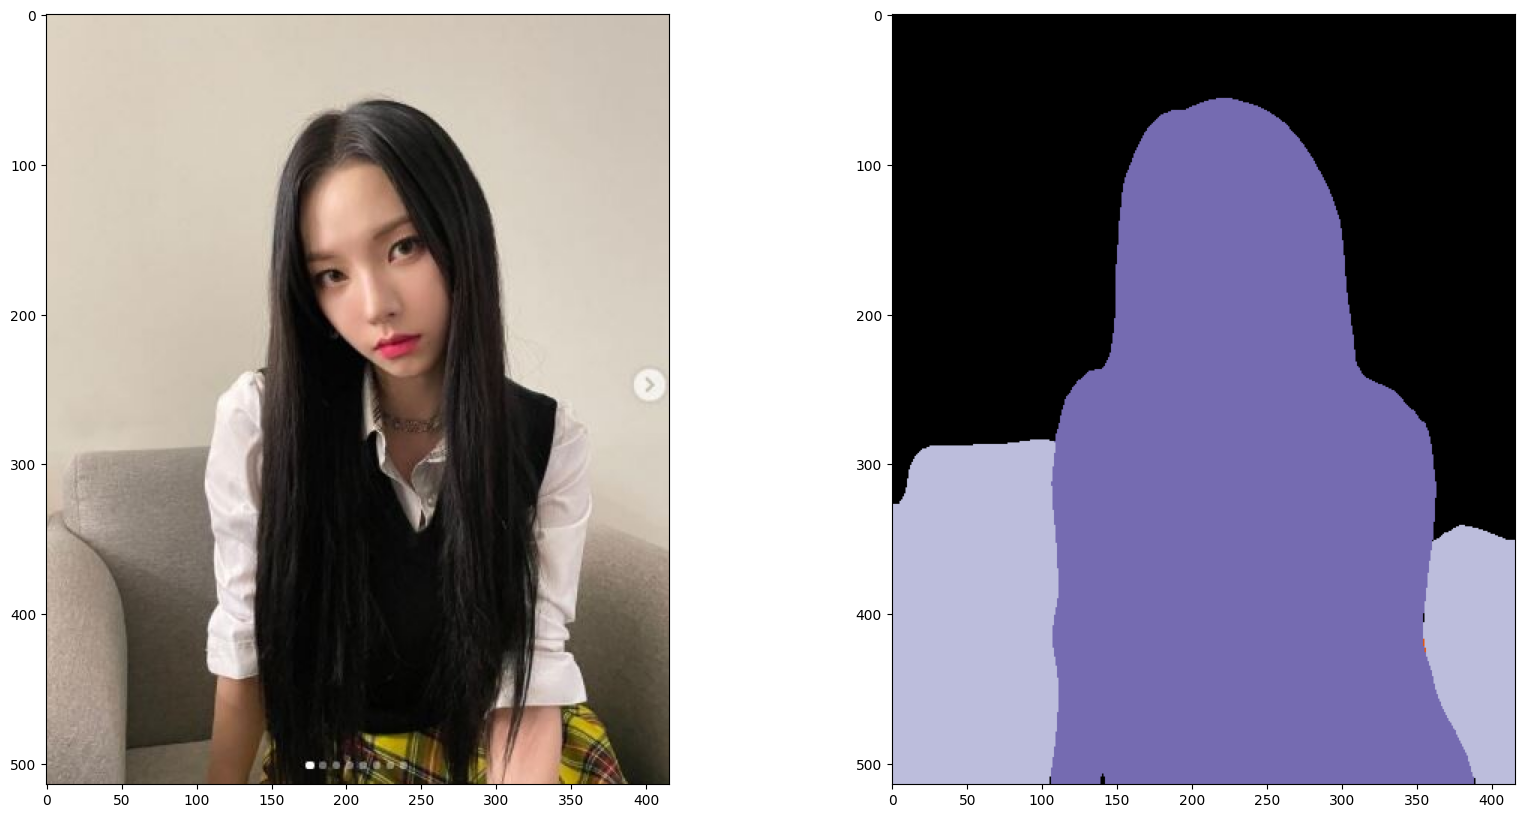

In [ ]:
img = np.array(Image.open('h.jpg'))
segment_map, pred = segment(model,img)

fig, axes = plt.subplots(1,2,figsize=(20,10))
axes[0].imshow(img)
axes[1].imshow(segment_map)

In [ ]:
pred

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [18, 18, 18, ..., 18, 18, 18],
       [18, 18, 18, ..., 18, 18, 18],
       [18, 18, 18, ..., 18, 18, 18]], dtype=uint8)

In [ ]:
!wget https://cdn.imweb.me/upload/S2017090459ad63af61840/5ac6db588cf82.jpg -O bg.jpg

--2023-09-06 01:16:34--  https://cdn.imweb.me/upload/S2017090459ad63af61840/5ac6db588cf82.jpg
Resolving cdn.imweb.me (cdn.imweb.me)... 18.172.122.24, 18.172.122.98, 18.172.122.100, ...
Connecting to cdn.imweb.me (cdn.imweb.me)|18.172.122.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 368055 (359K) [image/jpeg]
Saving to: ‘bg.jpg’

bg.jpg              100%[===================>] 359.43K   561KB/s    in 0.6s    

2023-09-06 01:16:36 (561 KB/s) - ‘bg.jpg’ saved [368055/368055]



In [ ]:
img.shape

(514, 416, 3)

In [ ]:
background = np.array(Image.open('bg.jpg'))
background.shape

(720, 1280, 3)

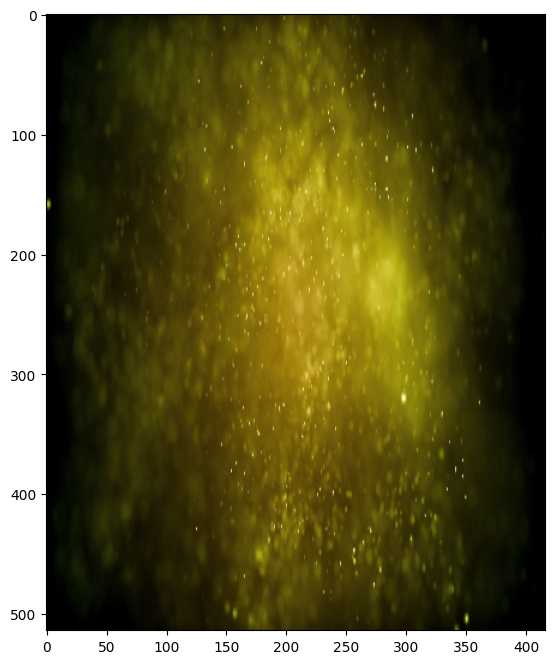

In [ ]:
background = np.array(Image.open('bg.jpg'))
fg_h ,fg_w,_ = img.shape
bg_h , bg_w,_ = background.shape

background = cv2.resize(background, dsize=(fg_w, int(fg_w*bg_h / bg_w)))
bg_h , bg_w,_ = background.shape

margin = (bg_h - fg_h) // 2

if margin > 0:
    background = background[margin:-margin, :,:,]

background = cv2.resize(background,dsize=(fg_w,fg_h))
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
cv2.imwrite('bg_1.jpg',background)
plt.figure(figsize=(12,8))
plt.imshow(background)

In [ ]:
mask = (pred==15)
mask = mask.astype(float) * 255
_, mask = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY)

In [ ]:
src = cv2.imread('h.jpg')
bg = cv2.imread('bg_1.jpg')
mask = (pred==15)
mask = mask.astype(float) * 255
_, mask = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY)
mask = cv2.GaussianBlur(mask, (9, 9), 0).astype(float)
mask = mask/255
mask = np.repeat(np.expand_dims(mask, axis=2), 3, axis=2)
foreground = cv2.multiply(mask.astype(float), src.astype(float))
cv2.imwrite('foreground.jpg', foreground)

True

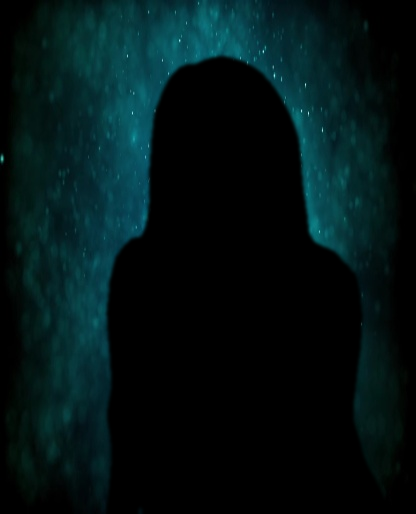

In [ ]:
background = cv2.multiply(1. - mask.astype(float), bg.astype(float))
cv2_imshow(background)

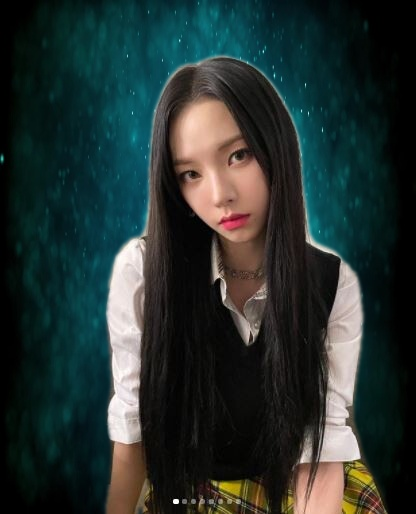

In [ ]:
result = cv2.add(foreground.astype(float), background.astype(float))
cv2_imshow(result)